# **4.8 Parameter tuning with HyperOpt**

### Some Method for HyperParam Tuning

1. Grid Search
2. Random Search (그리드서치를 랜덤하게)
3. Bayesian Optimization
4. Manual Tuning

그래디언트 부스팅방식은 튜닝해야할 하이퍼 파라미터 개수가 많고 범위가 넓어 경우의 수가 큰데, 이런경우 매우 오랜시간이 걸린다.

Random Search는 여러 경우의 수중에 랜덤으로 선택해서 하지만 정확도가 떨어질 것이다.
베이지안 최적화는 가능한 최소의 시도로 최적의 답을 찾아야하면 좋아지는 방향성으로 가는 방식으로 접근할 수 있다.

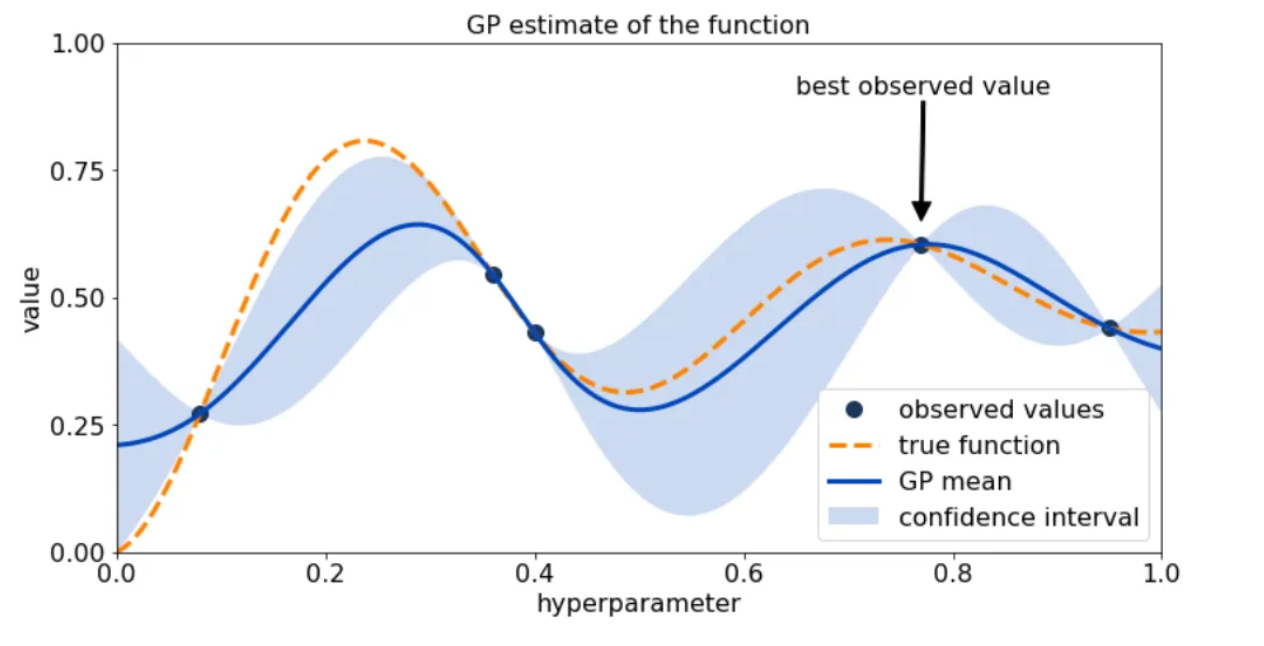

**Step 1 :** 랜덤하게 하이퍼 파라미터를 샘플링해서 성능을 관측  
**Step 2 :** 관측된 점들을 이어서 대체 모델이 최적 함수를 예측한다  
**Step 3 :** 획득 함수에서 다음으로 관측할 하이퍼 파라미터 추출  
**Step 4 :** 대체 모델이 예측을 수정  

**3가지를 기억하라**
1. Search Space (입력 값의 범위)
2. 목적 함수
3. 함수 반환 최솟값의 유추

In [1]:
pip install xgboost==2.0.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import hyperopt

print(hyperopt.__version__)

0.2.7


**1. Search Space (입력 값의 범위)**

In [3]:
from hyperopt import hp

# -10 ~ 10까지 1간격을 가지는 입력 변수 x와 -15 ~ 15까지 1간격으로 입력 변수 y 설정.
search_space = {'x': hp.quniform('x', -10, 10, 1), 'y': hp.quniform('y', -15, 15, 1) }

In [4]:
search_space

{'x': <hyperopt.pyll.base.Apply at 0x265e4c29290>,
 'y': <hyperopt.pyll.base.Apply at 0x265e4c29790>}

**2. 목적 함수**

In [5]:
from hyperopt import STATUS_OK

# 목적 함수를 생성. 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y # 그냥 예시로 이해를 돕기 위해 함수를 이렇게 넣은 것
    
    return retval

In [6]:
from hyperopt import fmin, tpe, Trials
import numpy as np

# 입력 결괏값을 저장한 Trials 객체값 생성.
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals=5)로 찾아냄.
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5
               , trials=trial_val, rstate=np.random.default_rng(seed=0))
# 하이퍼옵트에서 fmin이 베이지안 최적화를 수행
# algo에는 무조건 tpe.suggest를 넣는다
# 파라미터별 결과값을 trial_val에 저장한다
print('best:', best_01)

100%|████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1253.38trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


In [7]:
trial_val = Trials()

# max_evals를 20회로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20
               , trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_02)

100%|██████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1114.17trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


In [8]:
trial_val.results

[{'loss': -64.0, 'status': 'ok'},
 {'loss': -184.0, 'status': 'ok'},
 {'loss': 56.0, 'status': 'ok'},
 {'loss': -224.0, 'status': 'ok'},
 {'loss': 61.0, 'status': 'ok'},
 {'loss': -296.0, 'status': 'ok'},
 {'loss': -40.0, 'status': 'ok'},
 {'loss': 281.0, 'status': 'ok'},
 {'loss': 64.0, 'status': 'ok'},
 {'loss': 100.0, 'status': 'ok'},
 {'loss': 60.0, 'status': 'ok'},
 {'loss': -39.0, 'status': 'ok'},
 {'loss': 1.0, 'status': 'ok'},
 {'loss': -164.0, 'status': 'ok'},
 {'loss': 21.0, 'status': 'ok'},
 {'loss': -56.0, 'status': 'ok'},
 {'loss': 284.0, 'status': 'ok'},
 {'loss': 176.0, 'status': 'ok'},
 {'loss': -171.0, 'status': 'ok'},
 {'loss': 0.0, 'status': 'ok'}]

In [9]:
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


In [10]:
import pandas as pd

# results에서 loss 키값에 해당하는 밸류들을 추출하여 list로 생성. 
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성.
result_df = pd.DataFrame({'x': trial_val.vals['x'], 'y': trial_val.vals['y'], 'losses': losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


### HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
# 위스콘신 유방암 데이터

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']= dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

In [12]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156 )

# 앞에서 추출한 학습 데이터를 다시 학습과 검증 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

In [13]:
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                   }

In [14]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# max_depth, min_child_weight 는 정수형이 필요하므로 int를 해줘야한다.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space): # 오차를 반환해야한다.
    # 수행 시간 절약을 위해 nestimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK}

In [15]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best)

100%|███████████████████████████████████████████████| 50/50 [00:06<00:00,  7.47trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.684441779397407, 'learning_rate': 0.1475201153968472, 'max_depth': 9.0, 'min_child_weight': 2.0}


In [16]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(
    round(best['colsample_bytree'], 5), round(best['learning_rate'], 5),
    int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.68444, learning_rate:0.14752, max_depth:9, min_child_weight:2


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [18]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate=round(best['learning_rate'], 5),
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'], 5)
                           )

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
                eval_set=evals, verbose=True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.55271	validation_1-logloss:0.58669
[1]	validation_0-logloss:0.46532	validation_1-logloss:0.52479
[2]	validation_0-logloss:0.39616	validation_1-logloss:0.46923
[3]	validation_0-logloss:0.34165	validation_1-logloss:0.42858
[4]	validation_0-logloss:0.29745	validation_1-logloss:0.39483
[5]	validation_0-logloss:0.25934	validation_1-logloss:0.36657
[6]	validation_0-logloss:0.22862	validation_1-logloss:0.35072
[7]	validation_0-logloss:0.20367	validation_1-logloss:0.33159
[8]	validation_0-logloss:0.18239	validation_1-logloss:0.32347
[9]	validation_0-logloss:0.16291	validation_1-logloss:0.30890
[10]	validation_0-logloss:0.14780	validation_1-logloss:0.30568
[11]	validation_0-logloss:0.13390	validation_1-logloss:0.29906
[12]	validation_0-logloss:0.12276	validation_1-logloss:0.28876
[13]	validation_0-logloss:0.11289	validation_1-logloss:0.28343
[14]	validation_0-logloss:0.10346	validation_1-logloss:0.27987
[15]	validation_0-logloss:0.09554	validation_1-logloss:0.27622
[1

In [19]:
losses = [loss_dict['loss'] for loss_dict in trial_val.results]
result_df = pd.DataFrame({'max_depth': trial_val.vals['max_depth'],
                         'min_child_weight': trial_val.vals['min_child_weight'],
                         'colsample_bytree': trial_val.vals['colsample_bytree'],
                         'learning_rate': trial_val.vals['learning_rate'],
                         'losses': losses})

In [20]:
result_df

,max_depth,min_child_weight,colsample_bytree,learning_rate,losses
0,19.0,2.0,0.585235,0.033688,-0.949503
1,5.0,2.0,0.727186,0.105956,-0.962676
2,6.0,2.0,0.959945,0.154804,-0.958261
3,6.0,2.0,0.950012,0.120686,-0.956068
4,16.0,2.0,0.674336,0.142392,-0.960454
5,8.0,2.0,0.863774,0.106579,-0.956068
6,14.0,2.0,0.957521,0.079111,-0.958290
7,19.0,2.0,0.695018,0.095213,-0.962676
8,9.0,2.0,0.684442,0.147520,-0.967062
9,8.0,1.0,0.592116,0.081179,-0.951711
